<a href="https://colab.research.google.com/github/albertofernandezvillan/computer-vision-and-deep-learning-course/blob/main/keras_applications_feature_extraction_for_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summary
Keras Applications are deep learning models that are made available alongside pre-trained weights. These models can be used for prediction, feature extraction, and fine-tuning.

In this example, we are going to see how to use them for feature extraction. These features will be used as input for a clustering task. For more information about Keras Applications, see https://keras.io/api/applications/

At the end of this notebook you will be creating a binary classifier to classify dog vs cat images using a KMeans clustering algorithm. The features used as input to this classifier are going to be generated using a pre-trained VGG16 model. 

For futher information, you can check other related online resources:

*   [Using Keras’ Pre-trained Models for Feature Extraction in Image Clustering](https://franky07724-57962.medium.com/using-keras-pre-trained-models-for-feature-extraction-in-image-clustering-a142c6cdf5b1)

*   [Transfer Learning with Keras and Deep Learning](https://www.pyimagesearch.com/2019/05/20/transfer-learning-with-keras-and-deep-learning/)

*   [Transfer Learning in Keras with Computer Vision Models](https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/)

*   [A Detailed Introduction to K-means Clustering in Python](https://www.analyticsvidhya.com/blog/2020/12/a-detailed-introduction-to-k-means-clustering-in-python/)

*   [(ES) K-Means en Python paso a paso](https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/)

*   [K-Means Clustering in Python: A Practical Guide](https://realpython.com/k-means-clustering-python/)


## Context
This notebook is from the Course "***Computer vision in the new era of Artificial Intelligence and Deep Learning***", or "*Visión por computador en la nueva era de la Inteligencia Artificial y el Deep Learning*" (ES) from the "Second quarter university extension courses" that the University of Oviedo is offering (05/04/2021 - 16/04/2021)

|     |     |     |     
|--- | --- | ---|
| <img src ="https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/university_oviedo_logo.png" width=250 px>  | [Github Repository](https://github.com/albertofernandezvillan/computer-vision-and-deep-learning-course) | [Course Web Page Information](https://www.uniovi.es/estudios/extension/cursos2c/-/asset_publisher/SEp0PJi4ISGo/content/vision-por-computador-en-la-nueva-era-de-la-inteligencia-artificial-y-el-deep-learning?redirect=%2Festudios%2Fextension%2Fcursos2c) |

# Download the dataset from Kaggle
We will download a dataset from Kaggle.
A detail information about how to install kaggle API, configure it and check that it works see the notebook "set_up_kaggle_api_in_colab.ipynb" in this [course repository](https://github.com/albertofernandezvillan/computer-vision-and-deep-learning-course)

In [1]:
# Install kaggle API
! pip install kaggle
# Force install the latest version
! pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 6.3MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.10-cp36-none-any.whl size=73269 sha256=5976f6cb2a92a9b0f964c4ecbc6a5baefdcbc67740db2c7e56cb60e2c1b39153
  Stored in directory: /root/.cache/pip/wheels/3a/d1/7e/6ce09b72b770149802c653a02783821629146983ee5a360f10
Successfully built kaggle
  Found existing installation: kaggle 1.5.10
    Uninstalling kaggle-1.5.10:
      Successfully uninstalled kaggle-1.5.10


In [6]:
# Upload 'kaggle.json' file to Colab
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [7]:
# Move the uploaded file to a location ~/.kaggle/kaggle.json. 
# Additionally, you need to give proper permissions to the file (since this is a hidden folder). 
# Finally delete the kaggle.json file from the initial location
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! rm kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [8]:
# Checking that it works (optional). For example, run the following command:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         92           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        179           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        378           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2400           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      19003           False  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       5087           False  
connectx

In [9]:
# Download cats-dogs dataset and unzip it:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition
!unzip dogs-vs-cats-redux-kernels-edition

 99% 805M/814M [00:13<00:00, 66.6MB/s]
100% 814M/814M [00:13<00:00, 65.2MB/s]
Archive:  dogs-vs-cats-redux-kernels-edition.zip
  inflating: sample_submission.csv   
  inflating: test.zip                
  inflating: train.zip               


In [ ]:
!unzip train.zip -d train
!unzip test.zip -d test

In [11]:
train_dir = '/content/train/train'
test_dir = '/content/test/test'

# Introducing keras.applications for feature extraction
We are going to see how to perform feature extraction using VGG16 model. These features are extracted from a test image included in the repository. The first step is to import the required packages.

In [12]:
# Import required packages
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

We load the weights from 'imagenet' (pre-trained on ImageNet). Note also "include-top" option: whether to include the 3 fully-connected layers at the top of the network. In this case, these layers are not included.

In [13]:
# Load the model 
model = VGG16(weights="imagenet", include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


You can explore the loaded model using both `model.summary` and `plot_model` to understand what have been created and loaded.

In [14]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

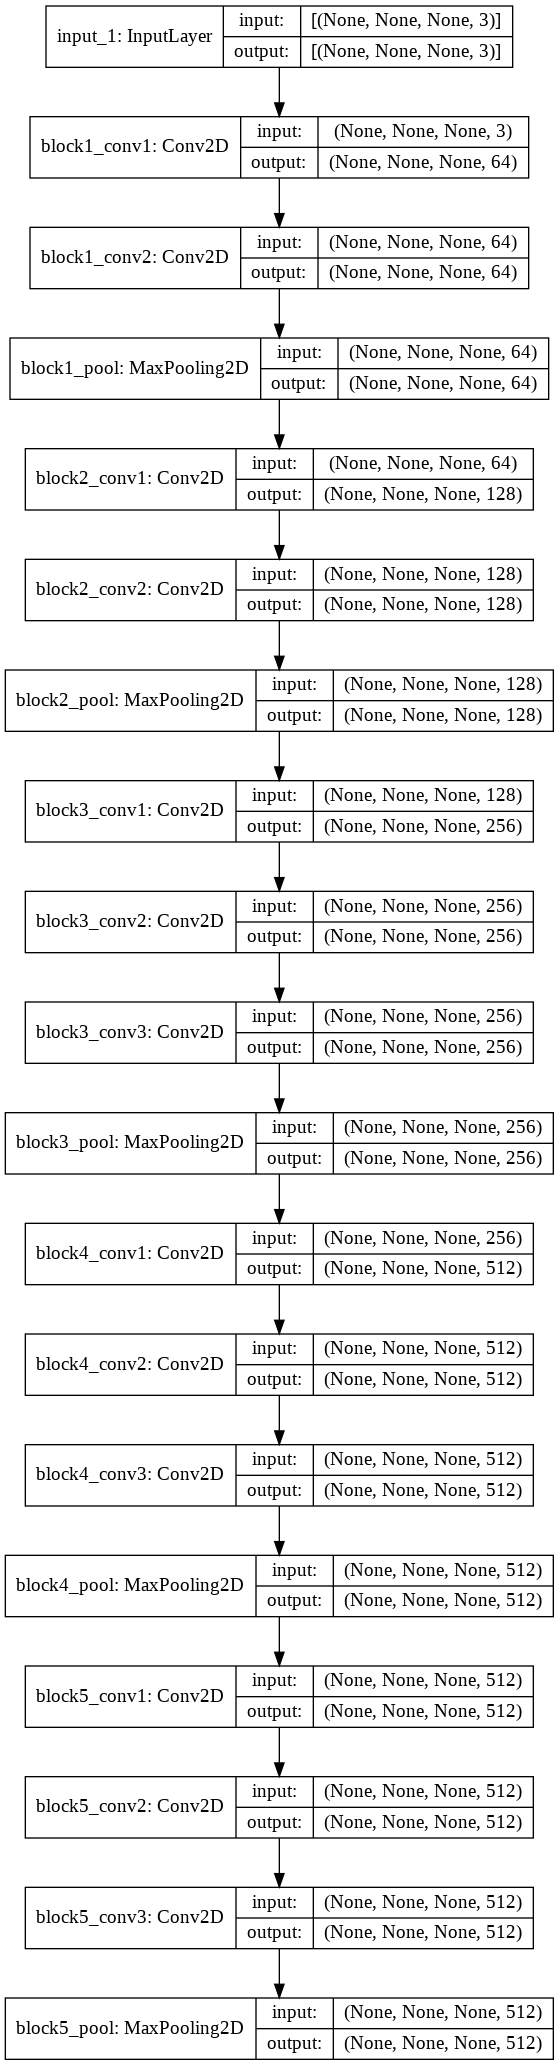

In [15]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='VGG16_without_fc_layers.png', show_shapes=True, show_layer_names=True)

We download a test image from the repository. This image will be used later (as an example) to extract the features from it using our feature extractor model

In [17]:
# Download the image from the repository and rename it to 'sample.png':
!wget https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/lenna.png -O sample.png

--2021-02-08 13:52:21--  https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/lenna.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88235 (86K) [image/png]
Saving to: ‘sample.png’

sample.png          100%[===================>]  86.17K  --.-KB/s    in 0.006s  

2021-02-08 13:52:21 (14.2 MB/s) - ‘sample.png’ saved [88235/88235]



At this point we can extract the features from the image. We also show the shape of the extracted features

In [18]:
import numpy as np

image = load_img('/content/sample.png', target_size=(224, 224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

vgg16_feature = model.predict(image)
# The output dimension of the max-pooling layer is (batch_size, 7, 7, 512)
# In this case, as we are only predicting one image will be (1, 7, 7, 512)
print("Shape of the features: '{}'".format(vgg16_feature.shape))

vgg16_feature_flatten = vgg16_feature.flatten()
print("Shape of the (flatten) features: '{}'".format(vgg16_feature_flatten.shape))

Shape of the features: '(1, 7, 7, 512)'
Shape of the (flatten) features: '(25088,)'


In [19]:
# Based on previous inspection, we create a function that receives the path
# of the image and returns the features in the form of a flatten array

import numpy as np

def get_features(path_image):
  img = load_img(path_image, target_size=(224, 224))
  img = img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = preprocess_input(img)

  vgg16_feats= model.predict(img)
  vgg16_feats_flat = vgg16_feats.flatten()

  return vgg16_feats_flat

# Test this function:
print("Shape of the features: '{}'".format(get_features('/content/sample.png').shape))

Shape of the features: '(25088,)'


# Train the classifier to distinguish between cat and dogs

We are going to train a classifier to distinguish between images containing cats and images containing dogs. To do it, we are going to train a [KMeans Clustering algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Note that we are going to use `N_CATS` and `N_DOGS` images to train this classifier. Further experiments can be added to see the minimum (or the optimal) number of images needed to train this classifier.


What we are going to do next is to extract the features from the first `N_CATS` and `N_DOGS` images included in the `train_dir` directory. All the extracted features are appended to `vgg16_feature_list` structure.

In [ ]:
import os

N_CATS = 100
N_DOGS = 100

curr_dogs = 0
curr_cats = 0

vgg16_feature_list = []

for filename in os.listdir(train_dir):
  path_image = os.path.join(train_dir, filename)
  print(filename)

  # check if we have finished extracting features:
  if curr_cats > N_CATS and curr_dogs > N_DOGS:
    print("we are done")
    break

  if "cat" in filename:
    curr_cats += 1
  
  if "dog" in filename:
    curr_dogs += 1
  
  if "cat" in filename and curr_cats > N_CATS:
    continue

  if "dog" in filename and curr_dogs > N_DOGS:
    continue

  features = get_features(path_image)
  vgg16_feature_list.append(features)

At this point, we check the shape of `vgg16_feature_list` taking into account that the we have processed a total of (`N_CATS` + `N_DOGS`) images.

In [21]:
vgg16_feature_list_np = np.array(vgg16_feature_list)
print(vgg16_feature_list_np.shape)

(200, 25088)


At this point, we are ready to train the KMeans clustering algorithm that will be used to classify the images into to classes (cats and dogs). The code to perform it should be:
```
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(vgg16_feature_list_np)
```

In this example is clear that the optimal number of clusters is 2, but a general approach is to find the optimal number of clusters, which is briefly explained as follows.

To perform the k-means clustering we need to find the value of the ‘k’ number of clusters and we can do that using the following code. Here we using several values of k for clustering and then selecting using the **Elbow method**.

As the number of clusters increases, the variance (within-cluster sum of squares) decreases. The elbow at 2 clusters represents the most parsimonious balance between minimizing the number of clusters and minimizing the variance within each cluster hence we can choose a value of k to be 2.

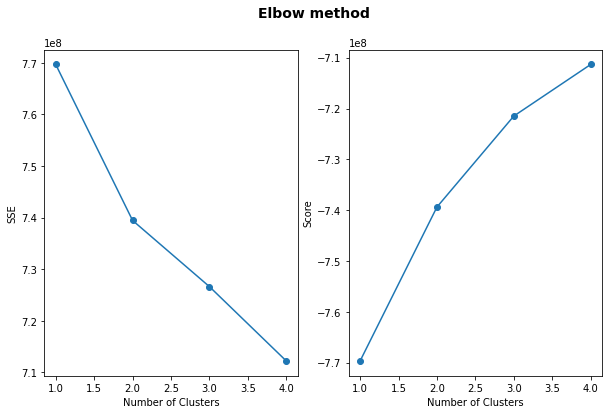

In [23]:
from sklearn.cluster import KMeans

Nc = range(1, 5)
kmeans = [KMeans(n_clusters=i) for i in Nc]

score = [kmeans[i].fit(vgg16_feature_list_np).score(vgg16_feature_list_np) for i in range(len(kmeans))]
SSE = [kmeans[i].fit(vgg16_feature_list_np).inertia_ for i in range(len(kmeans))]

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.suptitle("Elbow method", fontsize=14, fontweight='bold')

ax = plt.subplot(1, 2, 1)
plt.plot(Nc,SSE, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

ax = plt.subplot(1, 2, 2)
plt.plot(Nc,score, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')

plt.show()

Once introduced the Elbow mehtod to select the optimal number of classes, we create and fit the model using 2 clusters. Indeed, there are have classes ir our dataset (cats and dogs):

In [24]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(vgg16_feature_list_np)

# Predict the classes of test (new) images

Firs step it to create a function to predict a new image and also to print the predicted label over the image

In [25]:
from google.colab.patches import cv2_imshow
import cv2

def predict_image(path_image):
  label = kmeans.predict(get_features(path_image).reshape(1,-1))[0]

  img = cv2.imread(path_image)
  cv2.putText(img, str(label), (20, 60), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 2)

  return img

Just create the path to some test images to see if our classifier is abel to predict the correct label

In [26]:
PATH_TEST_IMG_1 = '/content/test/test/10000.jpg'
PATH_TEST_IMG_2 = '/content/test/test/10001.jpg'
PATH_TEST_IMG_3 = '/content/test/test/10002.jpg'
PATH_TEST_IMG_4 = '/content/test/test/10003.jpg'
PATH_TEST_IMG_5 = '/content/test/test/10004.jpg'
PATH_TEST_IMG_6 = '/content/test/test/10005.jpg'
PATH_TEST_IMG_7 = '/content/test/test/10006.jpg'
PATH_TEST_IMG_8 = '/content/test/test/10007.jpg'
PATH_TEST_IMG_9 = '/content/test/test/10008.jpg'
PATH_TEST_IMG_10 = '/content/test/test/10009.jpg'
PATH_TEST_IMG_11 = '/content/test/test/10010.jpg'
PATH_TEST_IMG_12 = '/content/test/test/10011.jpg'
PATH_TEST_IMG_13 = '/content/test/test/10012.jpg'
PATH_TEST_IMG_14 = '/content/test/test/10013.jpg'
PATH_TEST_IMG_15 = '/content/test/test/10014.jpg'

Finally, call `predict_image()` using the test path images introduced above and also show the resulting image using `cv2_imshow()`

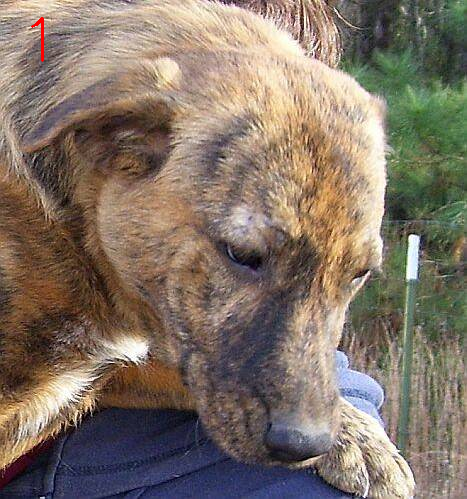

In [27]:
from google.colab.patches import cv2_imshow

cv2_imshow(predict_image(PATH_TEST_IMG_1))

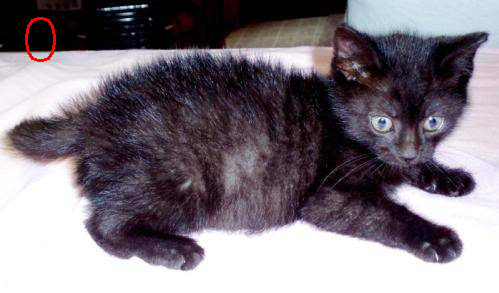

In [28]:
cv2_imshow(predict_image(PATH_TEST_IMG_2))

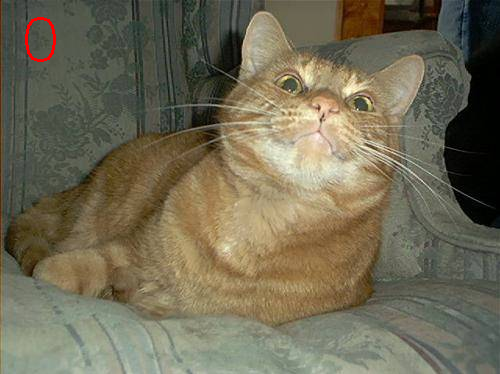

In [29]:
cv2_imshow(predict_image(PATH_TEST_IMG_3))

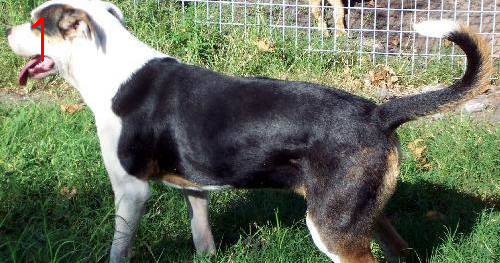

In [30]:
cv2_imshow(predict_image(PATH_TEST_IMG_4))

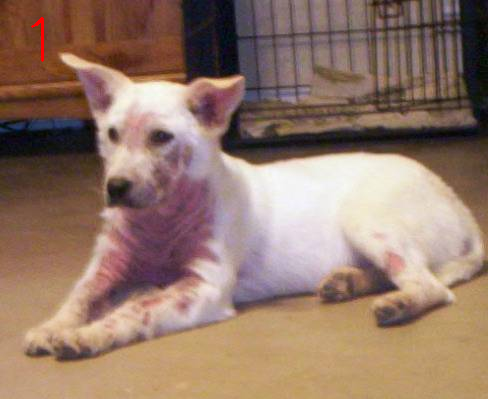

In [31]:
cv2_imshow(predict_image(PATH_TEST_IMG_5))

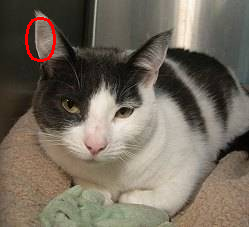

In [32]:
cv2_imshow(predict_image(PATH_TEST_IMG_6))

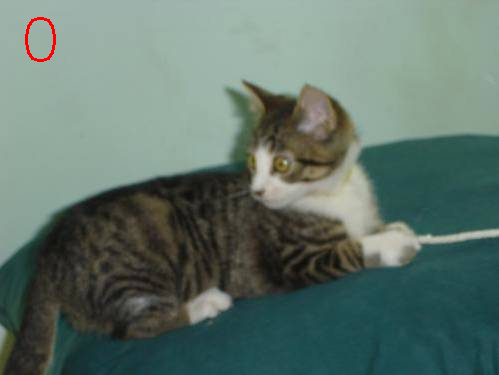

In [33]:
cv2_imshow(predict_image(PATH_TEST_IMG_7))

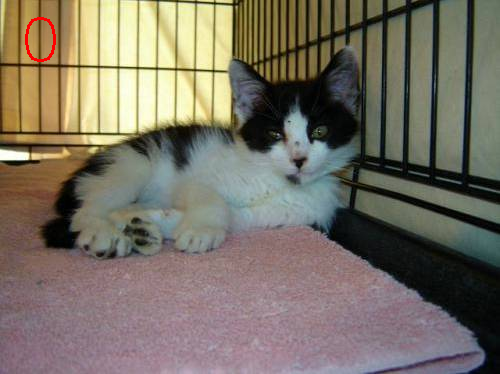

In [34]:
cv2_imshow(predict_image(PATH_TEST_IMG_8))

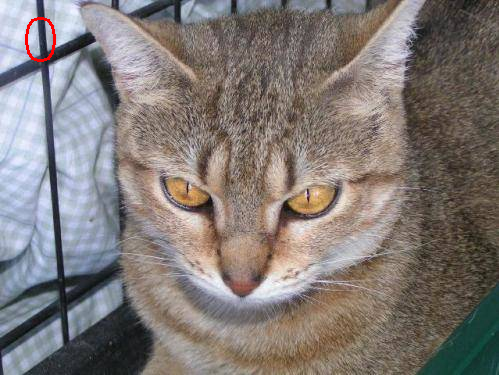

In [35]:
cv2_imshow(predict_image(PATH_TEST_IMG_9))

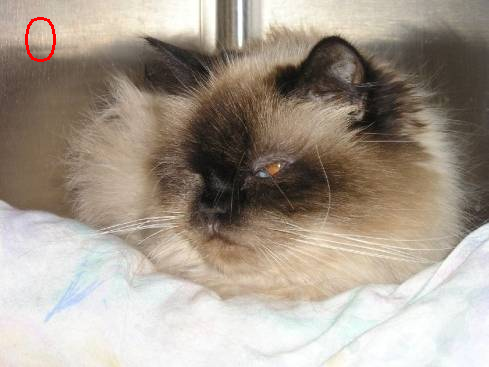

In [36]:
cv2_imshow(predict_image(PATH_TEST_IMG_10))

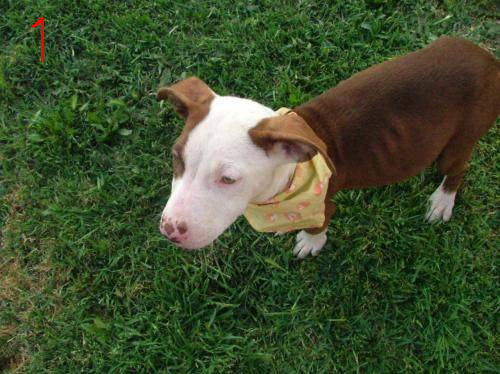

In [37]:
cv2_imshow(predict_image(PATH_TEST_IMG_11))

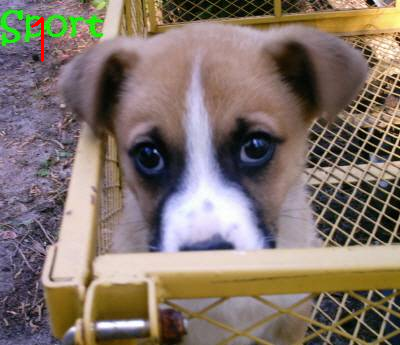

In [38]:
cv2_imshow(predict_image(PATH_TEST_IMG_12))

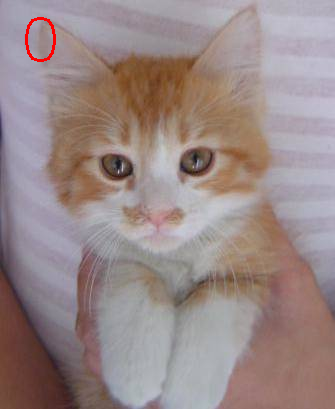

In [39]:
cv2_imshow(predict_image(PATH_TEST_IMG_13))

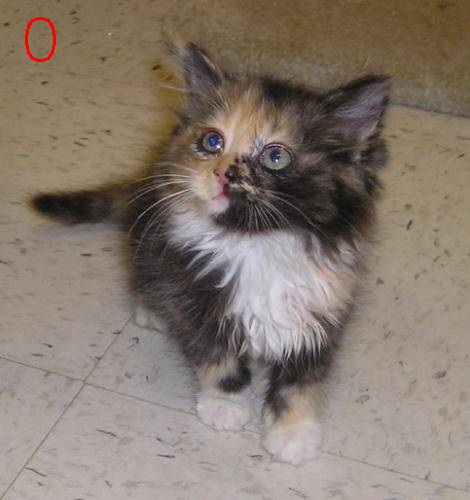

In [40]:
cv2_imshow(predict_image(PATH_TEST_IMG_14))

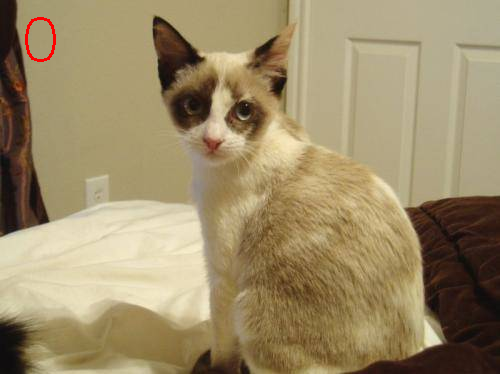

In [41]:
cv2_imshow(predict_image(PATH_TEST_IMG_15))

# Conclusions

In this notebook, we have seen how to use [Keras Applications ](https://keras.io/api/applications/) for feature extraction. In this example we have used the "Dogs vs. Cats Redux: Kernels Edition - Distinguish images of dogs from cats"  dataset from [Kaggle](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition). We have download the dataset using the Kaggle API. 

Therefore, we have perform feature extraction using a pre-trained [VGG16 model](https://keras.io/api/applications/vgg/#vgg16-function) using some images of the afforementioned dataset. This (and other models) are pre-trained on ImageNet. The default input size for this model is 224x224. As it is loaded for feature extraction, we have not loaded the weights for the 3 fully-connected layers at the top of the network. 

These extracted features are used to build a classifier to distinguish between cat and dog images. More specifically, we have trained a KMeans Clustering algorithm included in [Scikit-Learn library](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). 

Finally, we have tested the classifier with some test images (as a simple "validation") to see that this approach can be used for transfer learning problems.